# Tarea 04 Métodos Computacionales
## Gabriel Cataño Sánchez
### CC: 1039474879

# Taller Resolver los siguientes problemas, por el metodo de la biseccion, Punto fijo, newton, secante, etc.

1. *Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$

2. Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$


![Plano Inclinado](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig0.png)




3. Un reservorio de longitud L tiene una seccion transveral en forma de semicirculo con radio r.

\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

Determinar la profundidad del agua para L=10pies, r=1pies, V=12.4pies


![Reservorio](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig1.png)



4.Resolver la siguiente situación

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


![fallas_vehiculo](https://raw.githubusercontent.com/hernansalinas/Metodos_Computacionales_taller/main/sesiones/images/ecuacion_1_variable/Fig2.png)

Referencias: Numerical Analysis Book by J. Douglas Faires and Richard L. Burden




## Solución 

1. *Encontrar* los ceros de: $e^{x}-2= \cos(e^x-2)$

\begin{equation}
f(x) = e^{x} - 2 - \cos(e^x-2) 
\end{equation}

In [1]:
#librerias 
import numpy as np
from scipy import optimize
import matplotlib.pylab as plt

In [2]:
#Funciones separadas.
g = lambda x: np.exp(x) - 2
h = lambda x: np.cos(np.exp(x)- 2)

#Función a la que queremos encontrar raíces.
f = lambda x: g(x) - h(x)

In [3]:
#Puntos en los que se evaluará la función.
x = np.linspace(-2, 2, 100)

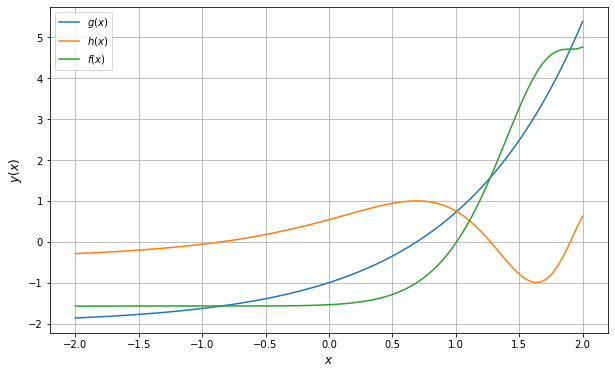

In [13]:
#Gráfica para tener una idea en donde están las raíces.
plt.figure(figsize = (10,6))
plt.plot(x, g(x), label="$g(x)$")
plt.plot(x, h(x), label="$h(x)$")
plt.plot(x, g(x) - h(x), label="$f(x)$")
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y(x)$', fontsize=12)
plt.grid()
plt.legend()

In [6]:
#Calculo de las raíces con el método "bisect".
root = optimize.bisect(f, 1, 4)
print({root})

{1.007623971657722}


In [7]:
##Calculo de las raíces con el método "Newton Rapshod".
root2 = optimize.newton(f, 3)
print({root2})

{1.0076239716581368}


In [8]:
#Error de máquina
root-root2

-4.147793219999585e-13

Punto 2:

\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) -\sin\omega t
\end{equation}

\begin{equation}
f(\omega,t ) = 2\omega^2(x(t)+\sin \omega t )
\end{equation}


\begin{equation}
g(\omega,t ) = -g\left( \frac{e^{\omega t}-e^{-\omega t}}{2}\right) 
\end{equation}



In [119]:
#Datos.
t = 1 #s
g = 9.76 #m/s^2

#Desplazamiento en t=1 segundo.
d = x = 0.51 #m

#Funciones separadas en función de omega.
f = lambda om : 2 * om**2 * (d + np.sin(om))
g = lambda om : -9.76 * 0.5 * (np.exp(om) - np.exp(-om))

#Función final en función de omega.
h = lambda om : f(om) - g(om)

#Puntos de evaluación en la función.
om = np.linspace(-np.pi/4, np.pi/4)

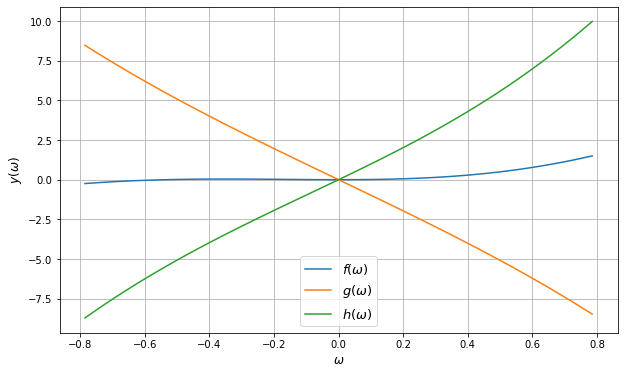

In [120]:
#Gráfica de las funciones para visualizar el comportamineto.
plt.figure(figsize = (10,6))
plt.plot(om, f(om), label='$f(\omega)$')
plt.plot(om, g(om), label='$g(\omega)$')
plt.plot(om, h(om), label='$h(\omega)$')
plt.xlabel('$\omega$', fontsize=12)
plt.ylabel('$y(\omega)$', fontsize=12)
plt.legend(fontsize=13)
plt.grid()

In [123]:
#Raíces de la función 'h', con el método bisect.
r1 = optimize.bisect(h, -1, 2)
print({r1})

{4.547473508864641e-13}


In [124]:
#Raíces de la función 'h', con el método newton.
r2 = optimize.newton(h, .5)
print({r2})

{1.7586197820958373e-17}


Punto 3: 
\begin{equation}
V=L \left ( \frac{1}{2}\pi r^2 -r^2 \arcsin{\frac{h}{r}}-h(r^2-h^2) ^{1/2} \right)
\end{equation}

L=10pies, r=1pies, V=12.4pies


In [68]:
#Datos
L = 10     #ft
r = 1      #ft
V = 12.4   #ft

#Funciones de h.
F = lambda h : V + L * r**2 * np.arcsin(h/r)
G = lambda h : L * (0.5* np.pi * r**2 - h * (r**2 - h**2)**0.5)

#Función final a la cual se encontrarán las raíces.
H = lambda h : F(h) - G(h)

#Puntos de evaluación de la función.
h = np.arange(-1,1, 0.2)

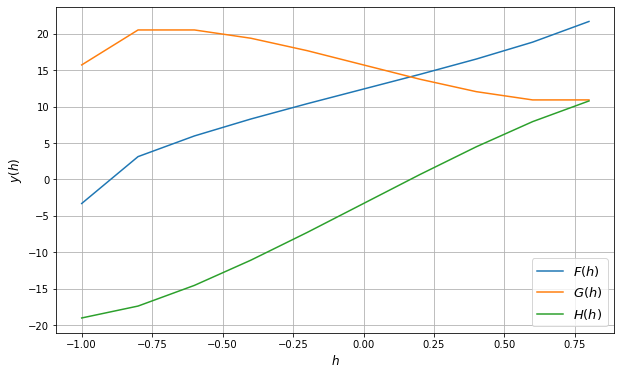

In [69]:
#Gráfica de las funciones para visualizar el comportamiento.
plt.figure(figsize = (10,6))
plt.plot(h, F(h), label='$F(h)$')
plt.plot(h, G(h), label='$G(h)$')
plt.plot(h, H(h), label='$H(h)$')
plt.xlabel('$h$', fontsize=12)
plt.ylabel('$y(h)$', fontsize=12)
plt.legend(fontsize=13)
plt.grid()

In [64]:
#Raíces de la función 'H', por el método bisect.
ra1 = optimize.bisect(H, -1, 1)
print({ra1})

{0.1661660346599092}


In [65]:
#Raíces de la función 'H', por el método newton.
ra2 = optimize.newton(H, 0)
print({ra2})

{0.16616603465836782}


In [136]:
print('La profundidad h, para los valores dados es: %.1f ft'%ra2)

La profundidad h, para los valores dados es: 0.2 ft


Punto 4:

\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados

In [97]:
#Datos
l = 89     #inch
h = 49     #inch
D = 55     #inch
be = np.deg2rad(11.5)  #rad

#Funciones de alpha.
P = lambda al: l * np.sin(be) * np.sin(al) * np.cos(al)
S = lambda al: l * np.cos(be) * (np.sin(al))**2
T = lambda al: ((h + 0.5 * D) * np.sin(be) - 0.5 * D * np.tan(be)) * np.cos(al)
U = lambda al: ((h + 0.5 * D) * np.cos(be) - 0.5 * D) * np.sin(al)

#Función final para hallar raíces.
Y = lambda al: P(al) + S(al) - T(al) - U(al)

#Puntos de evaluación de la función.
al = np.linspace(0, np.pi, 100)

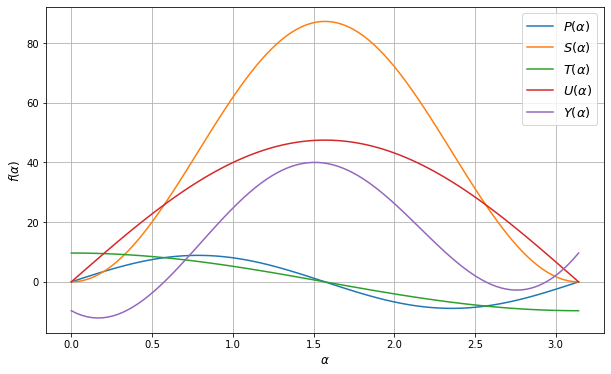

In [107]:
#Gráfica de las funciones para visualizar el comportamiento de cada una.
plt.figure(figsize = (10,6))
plt.plot(al, P(al), label='$P(\\alpha)$')
plt.plot(al, S(al), label='$S(\\alpha)$')
plt.plot(al, T(al), label='$T(\\alpha)$')
plt.plot(al, U(al), label='$U(\\alpha)$')
plt.plot(al, Y(al), label='$Y(\\alpha)$')
plt.xlabel('$\\alpha$', fontsize=12)
plt.ylabel('$f(\\alpha)$', fontsize=12)
plt.legend(fontsize=13)
plt.grid()

In [94]:
#Raíces de la función 'Y', por el método bisect.
raiz = optimize.bisect(Y,0,2)
print({raiz})

{0.5754730121934699}


In [117]:
#Raíces de la función 'Y', por el método newton.
Root1 = optimize.newton(Y, 1) 
print({Root1})

{0.5754730121943988}


In [118]:
#Conversión de las raíces a grados, ángulo resultante buscado. 
alpha = np.rad2deg(Root1)
print('El ángulo al que se aproxima la función con los datos dados es: %.1f °'%alpha)

El ángulo al que se aproxima la función con los datos dados es: 33.0 °





5. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

In [127]:
#Extra librerias
import matplotlib.pylab as plt
from PIL import Image

In [38]:
Npx_X = 80 #Número de pixeles en x
Npx_Y = 80 #Número de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creación de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1

#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1) + xmin
zy = npy * (ymax - ymin) / (Npx_Y - 1) + ymin


In [130]:
#Definicion  la funcion y las derivada.
#Función.
def f(z): 
    """
    Función compleja.
    
    Parámetros
    ----------
    z : Número complejo.
    
    Retorno
    ----------
    f(z) : Función evaluada en z.
    """
    
    return z**3 - 1

#Derivada de f(z).
def fp(z): 
    """
    Función derivada de f(z) definida anteriormente.
    
    Parámetros
    ----------
    z : Número complejo.
    
    Retorno
    ----------
    fp(z) = z**3 - 1 : Derivada de la función anterior.
    """
    
    return 3 * z**2

#Para hacer la derivada con la definición de derivada.
h = 1E-4
def fpn(z, h): 
    """
    Función que hace la derivada por medio de la definición.
    
    Parámetros
    ----------
    f(z) : Función compleja.
    h : Desplazamiento.
    
    Retorno
    ----------
    f'(z) : Derivada de f(z).
    """
    
    return (f(z + h) - f(z))/h
  

In [132]:
#Escalar que multiplica f(z)/f'(z) en N-R
a = 0.2

#Iteracciones que se quieren realizar para encontrar el resultado.
Niteraciones = 120

#Número mayor que cero para acotar un término.
eps = 1E-8

x = - 1
for zx_ in zx:
    x = x + 1 
    y = -1
    for zy_ in zy: 
        y = y + 1
        #Converción al plano complejo.
        Z_0 = complex(zx_, zy_)
        
        #Newton-Raphson
        for i in range(0, Niteraciones): 
            Z = Z_0 - a * f(Z_0)/fp(Z_0)

            if(abs(Z-Z_0)<= eps):
                break 
          
            Z_0 = Z
            #print(i)
            #print(i)
            #Escala de colores, espectro visible.
            r, g, b = i % 4 * 64 , i % 8 * 16, i% 16 * 16
      
            image.putpixel((x,y), (r,g,b) )


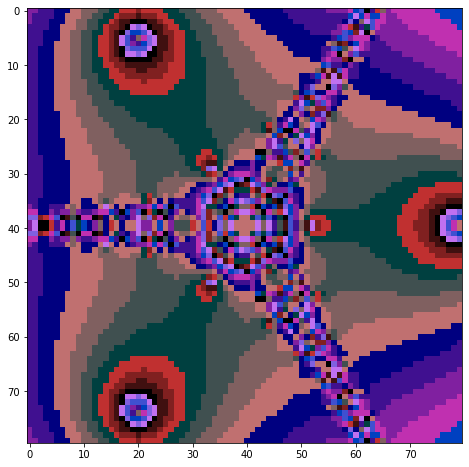

In [129]:
plt.figure(figsize=(8,8))
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
